![alt text](https://drive.google.com/uc?export=view&id=1UXScsVx_Wni_JuDdB8LeTnM6jsPfIwkW)

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

### Package Version:
- tensorflow==2.2.0
- pandas==1.0.5
- numpy==1.18.5
- google==2.0.3

# Sarcasm Detection

### Dataset

#### Acknowledgement
Misra, Rishabh, and Prahal Arora. "Sarcasm Detection using Hybrid Neural Network." arXiv preprint arXiv:1908.07414 (2019).

**Required Files given in below link.**

https://drive.google.com/drive/folders/1xUnF35naPGU63xwRDVGc-DkZ3M8V5mMk

### Load Data (3 Marks)

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/',force_remount=True)

Mounted at /content/gdrive/


In [4]:
import pandas as pd
import numpy as np
import hyperas

In [5]:
dataPath = '/content/gdrive/My Drive/AIML/NLP/Sarcasm_Detection/Sarcasm_Detection_Data/Data/'
jsonFilePath = '/content/gdrive/My Drive/AIML/NLP/Sarcasm_Detection/Sarcasm_Detection_Data/Data/Sarcasm_Headlines_Dataset.json'
glove200_FilePath = '/content/gdrive/My Drive/AIML/NLP/Sarcasm_Detection/Sarcasm_Detection_Data/Data/glove.6B.200d.txt'
word2Vec_FilePath = '/content/gdrive/My Drive/AIML/NLP/Sarcasm_Detection/Sarcasm_Detection_Data/Data/glove.6B.200d_txt.word2vec'

In [6]:
sarcasm_df = pd.read_json(jsonFilePath,lines=True)

In [7]:
sarcasm_df.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


### Drop `article_link` from dataset (3 Marks)

In [8]:
sarcasm_df.drop(columns=['article_link'],inplace=True)

In [9]:
sarcasm_df.head()

,headline,is_sarcastic
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
2,mom starting to fear son's web series closest ...,1
3,"boehner just wants wife to listen, not come up...",1
4,j.k. rowling wishes snape happy birthday in th...,0


### Get length of each headline and add a column for that (3 Marks)

In [10]:
sarcasm_df['headline_length'] = sarcasm_df.headline.str.len()

In [11]:
sarcasm_df.head()

,headline,is_sarcastic,headline_length
0,former versace store clerk sues over secret 'b...,0,78
1,the 'roseanne' revival catches up to our thorn...,0,84
2,mom starting to fear son's web series closest ...,1,79
3,"boehner just wants wife to listen, not come up...",1,84
4,j.k. rowling wishes snape happy birthday in th...,0,64


In [12]:
sarcasm_df.is_sarcastic.unique()

array([0, 1])

In [13]:
sarcasm_df.headline[0]

"former versace store clerk sues over secret 'black code' for minority shoppers"

### Initialize parameter values
- Set values for max_features, maxlen, & embedding_size
- max_features: Number of words to take from tokenizer(most frequent words)
- maxlen: Maximum length of each sentence to be limited to 25
- embedding_size: size of embedding vector

In [14]:
max_features = 10000
maxlen = 25
embedding_size = 200

### Apply `tensorflow.keras` Tokenizer and get indices for words (3 Marks)
- Initialize Tokenizer object with number of words as 10000
- Fit the tokenizer object on headline column
- Convert the text to sequence


In [15]:
from tensorflow.keras.preprocessing.text import Tokenizer
import re

In [16]:
def preprocessing(df):
  data = df.copy(True)
  data['headline'] = data['headline'].apply(lambda x: x.lower())
  pattern = '[^a-zA-Z0-9\s]'
  data['headline'] = data['headline'].apply((lambda x: re.sub(pattern,'',x)))
  return data

data = preprocessing(sarcasm_df)
tokenizer = Tokenizer(num_words=max_features,split=' ')
tokenizer.fit_on_texts(data['headline'].values)
sequences = tokenizer.texts_to_sequences(data['headline'].values)

In [17]:
len(sarcasm_df.headline[0])

78

In [18]:
data.headline[0]

'former versace store clerk sues over secret black code for minority shoppers'

In [19]:
sequences[0]

[293, 795, 3551, 2241, 47, 359, 92, 2138, 5, 2509, 8285]

### Pad sequences (3 Marks)
- Pad each example with a maximum length
- Convert target column into numpy array

In [20]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
after_padding_sequence = pad_sequences(sequences,maxlen=maxlen,padding='post',truncating='post')

In [21]:
after_padding_sequence[0]

array([ 293,  795, 3551, 2241,   47,  359,   92, 2138,    5, 2509, 8285,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0], dtype=int32)

### Vocab mapping
- There is no word for 0th index

In [ ]:
tokenizer.word_index

### Set number of words
- Since the above 0th index doesn't have a word, add 1 to the length of the vocabulary

In [94]:
num_words = len(tokenizer.word_index) + 1
print(num_words)

28400


### Load Glove Word Embeddings (3 Marks)

In [23]:
from gensim.models import  KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

glove2word2vec(glove200_FilePath,'glove.6B.200d_txt.word2vec')
model = KeyedVectors.load_word2vec_format('glove.6B.200d_txt.word2vec')


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


### Create embedding matrix

In [115]:
def embedMatrix():
  EMBEDDING_FILE =  glove200_FilePath
  # ./glove.6B.200d.txt'

  embeddings = {}
  for o in open(EMBEDDING_FILE):
      word = o.split(" ")[0]
      # print(word)
      embd = o.split(" ")[1:]
      embd = np.asarray(embd, dtype='float32')
      # print(embd)
      embeddings[word] = embd

  # create a weight matrix for words in training docs
  embedding_matrix = np.zeros((num_words, 200))

  for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings.get(word)
    if embedding_vector is not None:
      embedding_matrix[i] = embedding_vector

  return embedding_matrix

embedding_matrix = embedMatrix() 

In [116]:
print(embedding_matrix[1])

[ 5.73459983e-01  5.41700006e-01 -2.34770000e-01 -3.62399995e-01
  4.03699994e-01  1.13860004e-01 -4.49330002e-01 -3.09909999e-01
 -5.34110004e-03  5.84259987e-01 -2.59559993e-02  4.93930012e-01
 -3.72090004e-02 -2.84280002e-01  9.76959988e-02 -4.89069998e-01
  2.60269996e-02  3.76489997e-01  5.77879995e-02 -4.68070000e-01
  8.12880024e-02  3.28250003e+00 -6.36900008e-01  3.79559994e-01
  3.81670007e-03  9.36070010e-02 -1.28549993e-01  1.73800007e-01
  1.05219997e-01  2.86480010e-01  2.10889995e-01 -4.70759988e-01
  2.77330000e-02 -1.98029995e-01  7.63280019e-02 -8.46289992e-01
 -7.97079980e-01 -3.87430012e-01 -3.04220002e-02 -2.68489987e-01
  4.85850006e-01  1.28950000e-01  3.83540004e-01  3.87219995e-01
 -3.85239989e-01  1.90750003e-01  4.89980012e-01  1.32780001e-01
  1.07920002e-02  2.67699987e-01  1.78120002e-01 -1.14330001e-01
 -3.34939986e-01  8.73059988e-01  7.58750021e-01 -3.03779989e-01
 -1.56259999e-01  1.20850001e-03  2.33219996e-01  2.79529989e-01
 -1.84939995e-01 -1.41460

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
y =  data.is_sarcastic.values
type(y)

numpy.ndarray

In [30]:
X_train,X_test,y_train,y_test = train_test_split(after_padding_sequence,y,test_size=0.2,random_state=42)

In [62]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(21367, 25) (21367,)
(5342, 25) (5342,)


### Define model (5 Marks)
- Hint: Use Sequential model instance and then add Embedding layer, Bidirectional(LSTM) layer, then dense and dropout layers as required. 
In the end add a final dense layer with sigmoid activation for binary classification.

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,Dense,Bidirectional,LSTM, Dropout,SeparableConv1D,Activation
from tensorflow.keras.utils import  plot_model

from hyperas.distributions import  uniform,choice
from hyperas import optim
from hyperopt import Trials, STATUS_OK, tpe

In [153]:
# hyper parameter tunning

def data():
  return X_train, y_train, X_test, y_test

def create_model(X_train, y_train, X_test, y_test,):
  vocab_size = 28400
  max_features = 10000
  maxlen = 25
  embedding_size = 200

  sarcasm_df = pd.read_json('/content/gdrive/My Drive/AIML/NLP/Sarcasm_Detection/Sarcasm_Detection_Data/Data/Sarcasm_Headlines_Dataset.json',lines=True)
  data_df = sarcasm_df.copy(True)
  data_df['headline'] = data_df['headline'].apply(lambda x: x.lower())
  pattern = '[^a-zA-Z0-9\s]'
  data_df['headline'] = data_df['headline'].apply((lambda x: re.sub(pattern,'',x)))
 
  
  tokenizer = Tokenizer(num_words=10000,split=' ')
  tokenizer.fit_on_texts(data_df['headline'].values)
  sequences = tokenizer.texts_to_sequences(data_df['headline'].values)
  after_padding_sequence = pad_sequences(sequences,maxlen=maxlen,padding='post',truncating='post')
  y =  data_df.is_sarcastic.values

  X_train,X_test,y_train,y_test = train_test_split(after_padding_sequence,y,test_size=0.2,random_state=42)
  
  EMBEDDING_FILE =  '/content/gdrive/My Drive/AIML/NLP/Sarcasm_Detection/Sarcasm_Detection_Data/Data/glove.6B.200d.txt'
  
  embeddings = {}
  for o in open(EMBEDDING_FILE):
      word = o.split(" ")[0]
      # print(word)
      embd = o.split(" ")[1:]
      embd = np.asarray(embd, dtype='float32')
      # print(embd)
      embeddings[word] = embd

  # create a weight matrix for words in training docs
  embedding_matrix = np.zeros((vocab_size, 200))

  for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings.get(word)
    if embedding_vector is not None:
      embedding_matrix[i] = embedding_vector

  model = Sequential()
  model.add(Embedding(vocab_size,embedding_size,weights=[embedding_matrix],input_length=maxlen))
  model.add(Bidirectional(LSTM({{choice([128,256,512])}},dropout={{uniform(0,1)}},return_sequences=True)))
  model.add(Dense({{choice([128,256,512])}}))
  model.add(Activation({{choice(['relu','sigmoid','tanh'])}}))
  model.add(Dropout({{uniform(0,1)}}))
  model.add(Dense(1,activation='sigmoid'))

  model.compile(optimizer= {{choice(['adam','rmsprop','sgd'])}},loss='binary_crossentropy',metrics=['accuracy'])

  result = model.fit(X_train,y_train,
                    epochs={{choice([5,10,15,20])}},
                    batch_size={{choice([32,64,128])}},
                    verbose=2,
                    validation_split=0.2) 
  validation_acc = np.max(result.history['val_accuracy'])
  print('Best validation acc of epoch:', validation_acc)
  return {'loss': -validation_acc, 'status': STATUS_OK, 'model': model}

best_run, best_model = optim.minimize(create_model,
              data = data,
              algo=tpe.suggest,
              max_evals=5,
              trials=Trials(),
              notebook_name = '/gdrive/My Drive/AIML/NLP/Sarcasm_Detection/Sarcasm-Detection/NLP - Sarcasm Detection-checkpoint'
              )

print("Evalutation of best performing model:")
print(best_model.evaluate(X_test, y_test))
print("Best performing model chosen hyper-parameters:")
print(best_run)

>>> Imports:
#coding=utf-8

try:
    from google.colab import drive
except:
    pass

try:
    import pandas as pd
except:
    pass

try:
    import numpy as np
except:
    pass

try:
    import hyperas
except:
    pass

try:
    from tensorflow.keras.preprocessing.text import Tokenizer
except:
    pass

try:
    import re
except:
    pass

try:
    from tensorflow.keras.preprocessing.sequence import pad_sequences
except:
    pass

try:
    from gensim.models import KeyedVectors
except:
    pass

try:
    from gensim.scripts.glove2word2vec import glove2word2vec
except:
    pass

try:
    from sklearn.model_selection import train_test_split
except:
    pass

try:
    from tensorflow.keras.models import Sequential
except:
    pass

try:
    from tensorflow.keras.layers import Embedding, Dense, Bidirectional, LSTM, Dropout, SeparableConv1D, Activation
except:
    pass

try:
    from tensorflow.keras.utils import plot_model
except:
    pass

try:
    from hyperas.distributions import unifo

In [172]:
vocab_size = num_words
model = Sequential()
model.add(Embedding(vocab_size ,embedding_size,weights=[embedding_matrix],input_length=maxlen))
model.add(Bidirectional(LSTM(512,dropout=0.8366666847115819,return_sequences=True)))
model.add(Dense(128,activation='sigmoid'))
model.add(Dropout(0.9128294469805703))
model.add(Dense(1,activation='sigmoid'))

# {'Activation': 1, 'LSTM': 2, 'LSTM_1': 2, 'batch_size': 2, 'dropout': 0.8366666847115819, 'dropout_1': 0.9128294469805703, 'epochs': 2, 'optimizer': 0}

In [163]:
model.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_23 (Embedding)     (None, 25, 200)           5680000   
_________________________________________________________________
bidirectional_22 (Bidirectio (None, 25, 1024)          2920448   
_________________________________________________________________
dense_44 (Dense)             (None, 25, 128)           131200    
_________________________________________________________________
dropout_22 (Dropout)         (None, 25, 128)           0         
_________________________________________________________________
dense_45 (Dense)             (None, 25, 1)             129       
Total params: 8,731,777
Trainable params: 8,731,777
Non-trainable params: 0
_________________________________________________________________


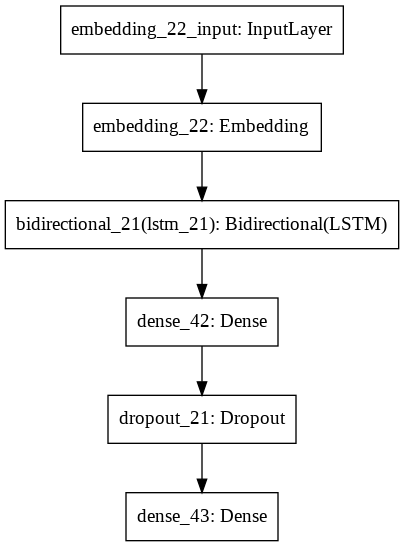

In [156]:
plot_model(model,'Sarcasm_detection_model.png')

### Compile the model (3 Marks)

In [173]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

### Fit the model (4 Marks)

In [174]:
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

es = EarlyStopping(monitor='val_loss',min_delta=0.01,patience=2)
filepath="weights-improvement-{epoch:02d}-{val_loss:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath,
                             monitor='val_loss',
                             verbose=1,
                             save_best_only=True,
                             save_weights_only=True,
                             mode='max'
                            )


In [175]:
batch_size = 128
epochs = 10
result = model.fit(X_train,y_train,epochs=epochs,batch_size=batch_size,verbose=1,validation_split=0.2) # callbacks=[es,checkpoint]

Epoch 1/10
134/134 [==============================] - 19s 140ms/step - loss: 0.7097 - accuracy: 0.5551 - val_loss: 0.6881 - val_accuracy: 0.5538
Epoch 2/10
134/134 [==============================] - 16s 121ms/step - loss: 0.6871 - accuracy: 0.5629 - val_loss: 0.6873 - val_accuracy: 0.5538
Epoch 3/10
134/134 [==============================] - 16s 116ms/step - loss: 0.6869 - accuracy: 0.5627 - val_loss: 0.6856 - val_accuracy: 0.5538
Epoch 4/10
134/134 [==============================] - 16s 116ms/step - loss: 0.6663 - accuracy: 0.5630 - val_loss: 0.5966 - val_accuracy: 0.5584
Epoch 5/10
134/134 [==============================] - 16s 121ms/step - loss: 0.6118 - accuracy: 0.6069 - val_loss: 0.5180 - val_accuracy: 0.7459
Epoch 6/10
134/134 [==============================] - 16s 116ms/step - loss: 0.5497 - accuracy: 0.7017 - val_loss: 0.4148 - val_accuracy: 0.8150
Epoch 7/10
134/134 [==============================] - 15s 115ms/step - loss: 0.4772 - accuracy: 0.7814 - val_loss: 0.3745 - val_ac

In [176]:
model.evaluate(X_test,y_test)

167/167 [==============================] - 2s 14ms/step - loss: 0.3448 - accuracy: 0.8614


[0.34476619958877563, 0.8614002466201782]

Text(0, 0.5, 'Test')

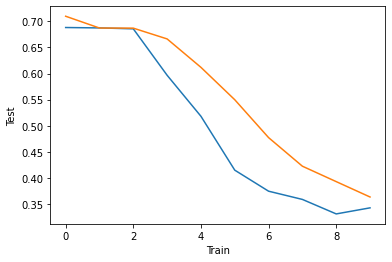

In [177]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(result.history['val_loss'])
plt.plot(result.history['loss'])
plt.xlabel('Train')
plt.ylabel('Test')

Text(0, 0.5, 'Test')

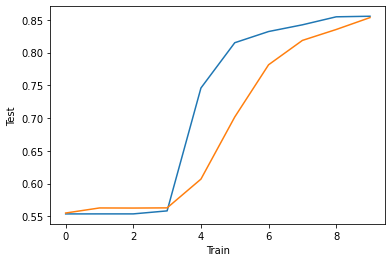

In [178]:
plt.plot(result.history['val_accuracy'])
plt.plot(result.history['accuracy'])
plt.xlabel('Train')
plt.ylabel('Test')

**SAVE** MODEL

In [180]:
model_json  = model.to_json()
with open('model.json','w') as json_file:
  json_file.write(model_json)

model.save_weights('model_weights.h5')